# 의사결정나무

`sklearn` 패키지
- `DecisionTreeClassifier`: 분류 트리 생성<br>
- `RegressionTreeClassifier`: 회귀 트리 생성<br>

`graphviz` 패키지: 시각화

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz

In [2]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 의사결정나무 구축 - 지니계수

지니계수를 활용한 트리를 구축해보자.

In [7]:
clf = tree.DecisionTreeClassifier(criterion = 'gini')
clf = clf.fit(iris.data, iris.target)

구축한 트리를 시각화해보자.

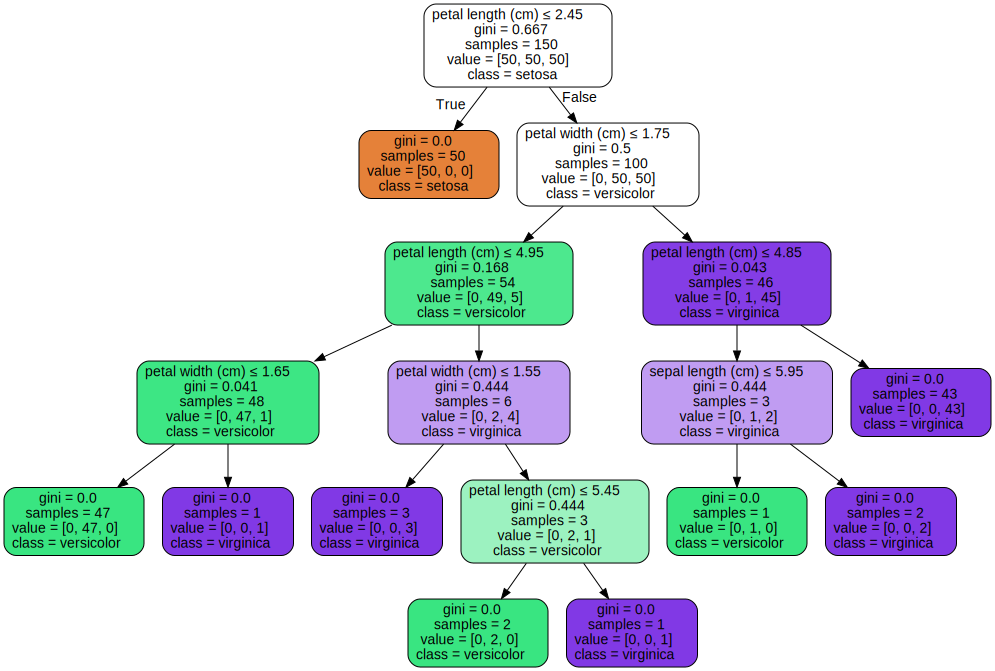

In [10]:
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = iris.feature_names, class_names = iris.target_names,
                                filled = True, rounded = True, special_characters = True)

graph = graphviz.Source(dot_data)
graph

### 의사결정나무 구축 - 엔트로피

엔트로피를 활용한 트리를 구축해보자.

In [18]:
clf2 = tree.DecisionTreeClassifier(criterion = 'entropy')
clf2 = clf2.fit(iris.data, iris.target)

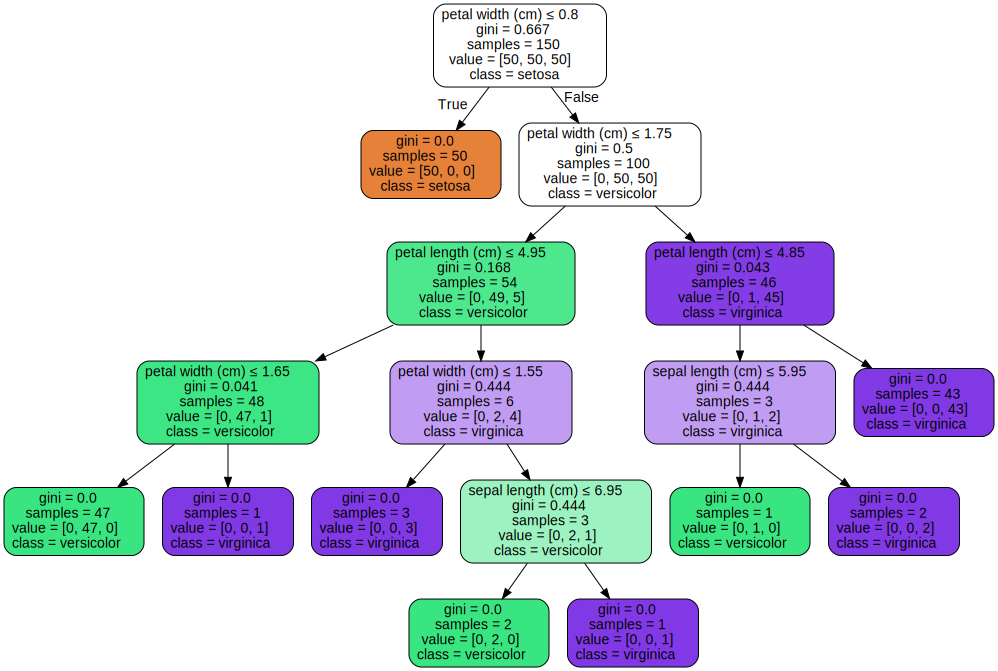

In [19]:
dot_data2 = tree.export_graphviz(clf3, out_file = None, feature_names = iris.feature_names, class_names = iris.target_names,
                                filled = True, rounded = True, special_characters = True)

graph2 = graphviz.Source(dot_data2)
graph2

### 가지치기

max_depth 옵션을 추가하여 가지의 개수를 조절해준다.<br>
기존에 엔트로피가 0이 될 때까지 분류했던 것과 다르게 가지가 2개 뻗어나간 후 분류를 멈춘 것을 확인할 수 있다.

In [20]:
clf3 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=2)
clf3 = clf3.fit(iris.data, iris.target)

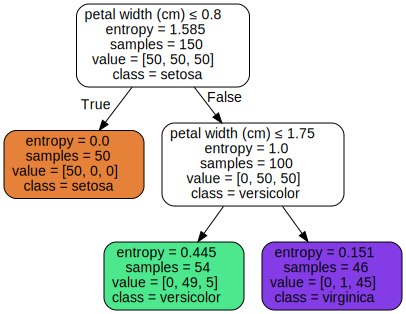

In [21]:
dot_data3 = tree.export_graphviz(clf3, out_file = None, feature_names = iris.feature_names, class_names = iris.target_names,
                                filled = True, rounded = True, special_characters = True)

graph3 = graphviz.Source(dot_data3)
graph3

### 성능 평가

혼동 행렬을 통해 앞서 구한 의사결정나무의 성능을 비교해보자.

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=1)

**지니 계수를 기준으로 학습시킨 의사결정나무**

In [41]:
clf.fit(X_train, y_train)
confusion_matrix(y_test, clf.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]])

In [42]:
print(classification_report(y_test, clf.predict(X_test), target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



**엔트로피를 기준으로 학습시킨 의사결정나무**

In [43]:
clf2.fit(X_train, y_train)
confusion_matrix(y_test, clf2.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]])

In [44]:
print(classification_report(y_test, clf2.predict(X_test), target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



**엔트로피를 기준으로 학습시키고 가지치기를 진행한 의사결정나무**

In [45]:
clf3.fit(X_train, y_train)
confusion_matrix(y_test, clf3.predict(X_test))

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 12]])

In [46]:
print(classification_report(y_test, clf3.predict(X_test), target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

